#### **Encoding Text**

Encoding text includes converting text into machine-readable numbers for analysis and modeling


Widely used encoding techniques are -
- **One-hot Encoding**: Transforms words into unique numerical representations
- **Bag-of-Words (BoW)** : Captures word frequency, disregarding it's order
- **TF-IDF**: Balances uniqueness and importance of words
- **Embedding**: Converts words into vectors representing semantic meanings

#### **One-hot encoding**

- It maps each words to a distinct vector. All vectors are of same dimensions, containing 1 and 0s.
- We can use `torch.eye` function to generate one-hot vectors of size = `vocab_size`.
- We then map the encoded vectors to the words.

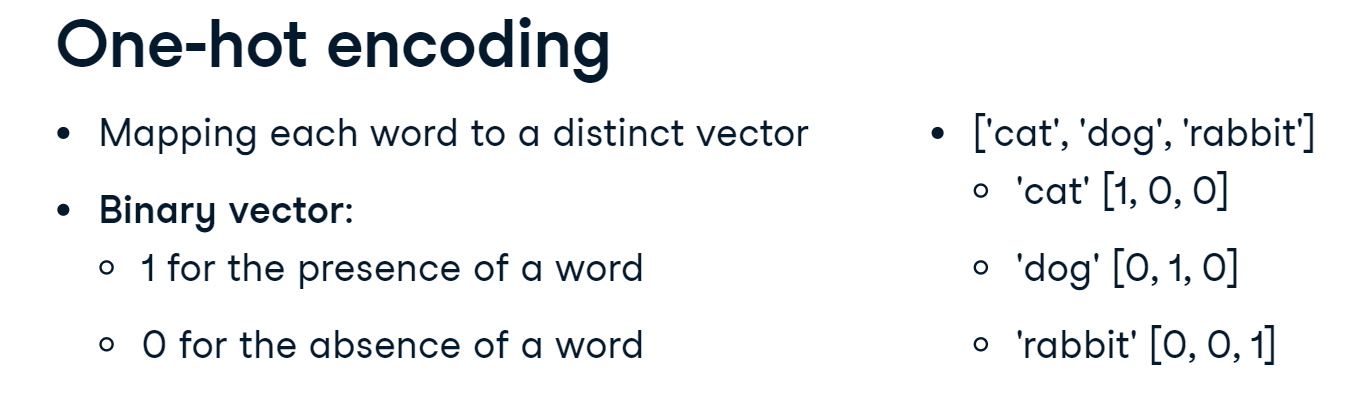

In [3]:
import torch

vocab = ['lion', 'tiger', 'wolf', 'cheetah']
vocab_size = len(vocab)
one_hot_vectors = torch.eye(vocab_size)
one_hot_dict = {word: one_hot_vectors[i] for i, word in enumerate(vocab)}
one_hot_dict

{'lion': tensor([1., 0., 0., 0.]),
 'tiger': tensor([0., 1., 0., 0.]),
 'wolf': tensor([0., 0., 1., 0.]),
 'cheetah': tensor([0., 0., 0., 1.])}

#### **Bag-of-words**

- It can add more meaning with bag-of-words, which treats a document as an unordered collection of words
- It emphasizes word frequency over order.
- We can use `CountVectorizer` function of `sklearn.feature_extraction.text`

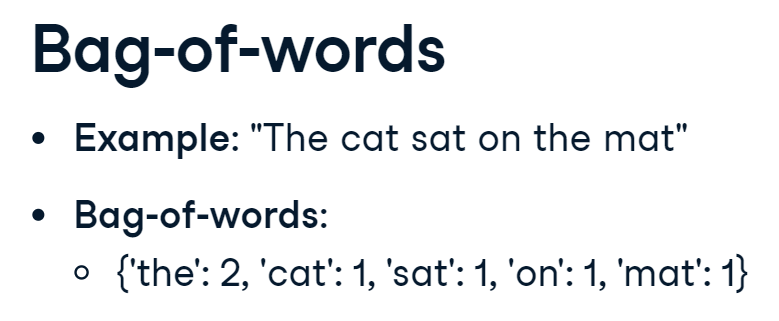

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
corpus = ['this is the first document.', 'this document is the second document.', 'and this is the third one.', 'is this the first document?']

X = vectorizer.fit_transform(corpus)

print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


#### **TD-IDF (Term Frequency - Inverse Document Frequency)**

- It assesses word importance by considering word frequency across all documents.
- It assigns higer score to rare words and lower scores to common ones. 
- It emphasizes informative words in our text data, unlike bag-of-words, which treats all words equally.
- We can use `TfidfVectorizer` fucntion from `sklearn.feature_extraction.text`

In [13]:
from sklearn.feature_extraction.text import argish

vectorizer = TfidfVectorizer()
corpus = ['this is the first document.', 'this document is the second document.', 'and this is the third one.', 'is this the first document?']
X = vectorizer.fit_transform(corpus)

print(X.toarray())
print(vectorizer.get_feature_names_out())

[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


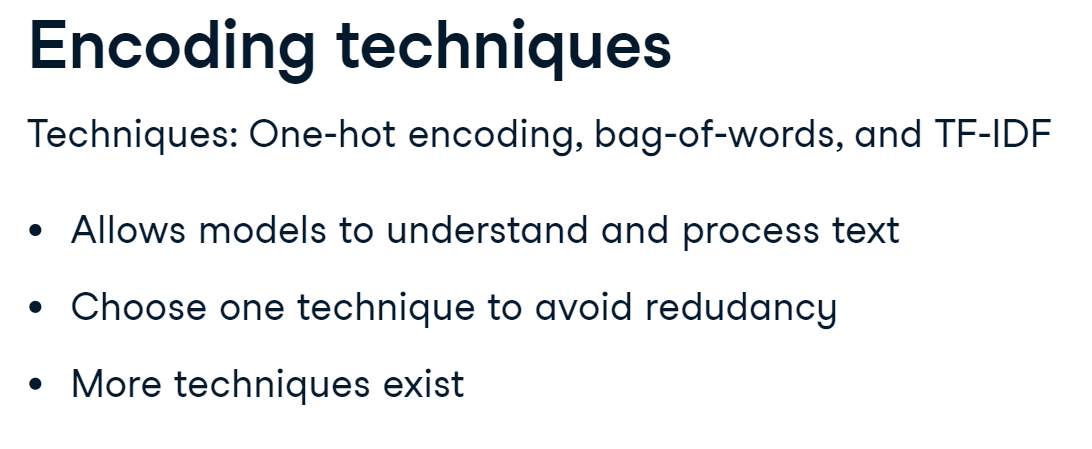